*   initial libs and check for missing values
*   reverse ordering of dataFrame rows and reset index
*   convert date column format
*   Visualizing bitcoin data
*   building random forest mode

# initial libs and check for missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

plt.style.use('seaborn-darkgrid')
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BitcoinHistoricalDataInvesting.csv'

df=pd.read_csv(path)

Mounted at /content/drive


# reverse ordering of dataFrame rows and reset index

In [2]:
df = df[::-1].reset_index(drop = True) 

# convert date column format

In [3]:
df['Date']= df['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))

In [4]:
df.rename({'Price':'Close'}, axis=1 , inplace=True)
btc = df.copy()
btc.drop(['Date','Vol.','Change %'], axis=1 , inplace=True)
btc.head()

,Close,Open,High,Low
0,0.1,0.0,0.1,0.1
1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1


In [5]:
btc.shape

(3941, 4)

# Visualizing bitcoin data and indicators

*   SMA
*   EMA
*   RSI

# SMA

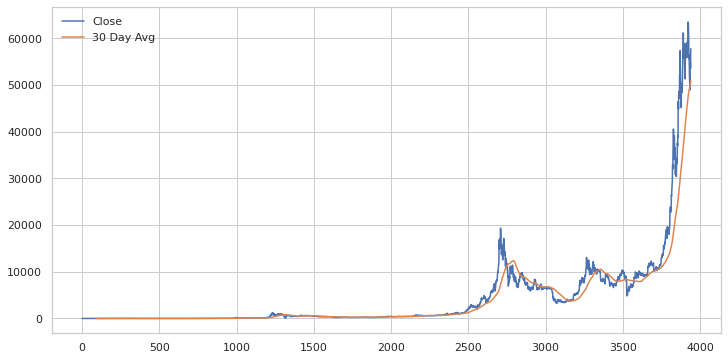

In [6]:
sns.set()
sns.set_style('whitegrid')
btc['Close'].plot(figsize=(12,6),label='Close')
btc['Close'].rolling(window=100).mean().plot(label='100 Day Avg')
plt.legend()

# EMA

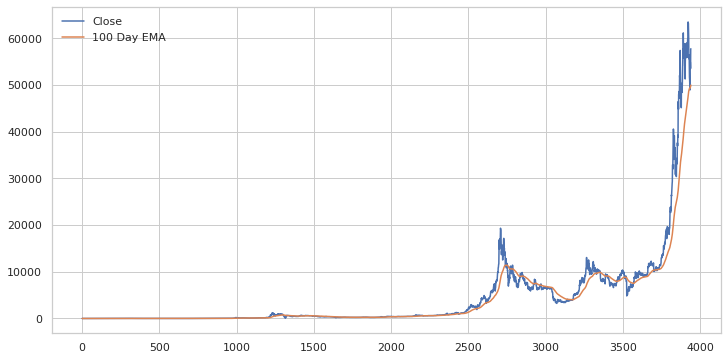

In [15]:
sns.set()
sns.set_style('whitegrid')
btc['Close'].plot(figsize=(12,6),label='Close')
btc['Close'].ewm(span=100,adjust=False).mean().plot(label='100 Day EMA')
plt.legend()

# RSI

            Date    Close     Open  ...     Vol.  Change %        RSI
14    2010-08-01      0.1      0.1  ...    2.60K     0.00%        NaN
15    2010-08-02      0.1      0.1  ...    3.60K     0.00%        NaN
16    2010-08-03      0.1      0.1  ...    9.82K     0.00%        NaN
17    2010-08-04      0.1      0.1  ...    3.49K     0.00%        NaN
18    2010-08-05      0.1      0.1  ...    5.03K     0.00%        NaN
...          ...      ...      ...  ...      ...       ...        ...
3936  2021-04-27  55036.5  54011.1  ...   84.08K     1.88%  48.298927
3937  2021-04-28  54841.4  55036.0  ...   86.96K    -0.35%  47.844811
3938  2021-04-29  53560.8  54838.6  ...   83.90K    -2.34%  44.863145
3939  2021-04-30  57720.3  53562.3  ...  103.74K     7.77%  54.731274
3940  2021-05-01  57807.1  57719.1  ...   63.41K     0.15%  54.912622

[3927 rows x 8 columns]


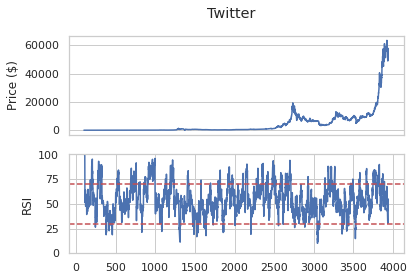

In [18]:
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

df['RSI'] = 100 - (100/(1 + rs))

# Skip first 14 days to have real values
df = df.iloc[14:]

print(df)
fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('Twitter')

df['Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
df['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('RSI')

plt.show()